# 📊 Análise Financeira Estratégica: Extraindo Insights de Movimentações
## O objetivo é explorar dados financeiros — incluindo recebimentos e pagamentos — para identificar padrões críticos, tendências temporais e oportunidades de otimização no fluxo de caixa.
## Utiliza-se o poder do Python para o tratamento estatístico e visualizações avançadas, aliado à acessibilidade do Excel para validação de dados e criação de relatórios executivos.



In [1]:
# pegando arquivo no drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
# CODE PYTHON 3
# Importaçao das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## verificação e tratamento de dados


In [24]:
# importa a base de dados e buscar informações iniciais
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/datasets/Base Financeiro.xlsx')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2725 entries, 0 to 2724
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Numero Movimentacao    2725 non-null   int64         
 1   Nome                   2725 non-null   object        
 2   Município              2725 non-null   object        
 3   Data da Movimentacao   2725 non-null   datetime64[ns]
 4   Valor da Movimentação  2725 non-null   float64       
 5   Tipo                   2725 non-null   object        
 6   Banco                  2725 non-null   object        
 7   Imagem                 2725 non-null   object        
 8   Forma Pagamento        2725 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 191.7+ KB


,Numero Movimentacao,Nome,Município,Data da Movimentacao,Valor da Movimentação,Tipo,Banco,Imagem,Forma Pagamento
0,1,Caramuru Pie I,São Paulo,2020-01-02,675.87,Recebimento,Itaú,https://i.ibb.co/DznB5q4/Itau.png,Pix
1,2,Indaia,Belo Horizonte,2020-01-04,1562555.94,Recebimento,Nubank,https://i.ibb.co/LpJM38D/Nubank.png,Boleto
2,3,Diamante Iii,São Paulo,2020-01-04,4970.12,Recebimento,Nubank,https://i.ibb.co/LpJM38D/Nubank.png,Boleto
3,4,Diamante Iii,São Paulo,2020-01-04,6716.79,Recebimento,Nubank,https://i.ibb.co/LpJM38D/Nubank.png,Pix
4,5,Diamante Iii,Vitória,2020-01-04,7072.15,Recebimento,Bradesco,https://i.ibb.co/68RXB19/Bradesco.png,MercadoPago


In [25]:
# Ajustando nomes das colunas
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace('movimentacao', 'movimentação', regex=False)

# apagando colunas desnecessarias
df.drop(columns=['imagem', 'numero movimentação'], inplace=True)

# mudando tipo de dados
df['forma pagamento'] = df['forma pagamento'].astype('category')
df.head()

,nome,município,data da movimentação,valor da movimentação,tipo,banco,forma pagamento
0,Caramuru Pie I,São Paulo,2020-01-02,675.87,Recebimento,Itaú,Pix
1,Indaia,Belo Horizonte,2020-01-04,1562555.94,Recebimento,Nubank,Boleto
2,Diamante Iii,São Paulo,2020-01-04,4970.12,Recebimento,Nubank,Boleto
3,Diamante Iii,São Paulo,2020-01-04,6716.79,Recebimento,Nubank,Pix
4,Diamante Iii,Vitória,2020-01-04,7072.15,Recebimento,Bradesco,MercadoPago


In [26]:
# valores nulos ou duplicados
print(f'VALORES NULOS:')
print(df.isnull().sum())
print(f'\nVALORES DUPLICADOS: {df.duplicated().sum()}')

VALORES NULOS:
nome                     0
município                0
data da movimentação     0
valor da movimentação    0
tipo                     0
banco                    0
forma pagamento          0
dtype: int64

VALORES DUPLICADOS: 4


## Análise Inicial dos Dados


In [27]:
df.shape

(2725, 7)

In [28]:
df.columns

Index(['nome', 'município', 'data da movimentação', 'valor da movimentação',
       'tipo', 'banco', 'forma pagamento'],
      dtype='object')

In [29]:
df.dtypes

,0
nome,object
município,object
data da movimentação,datetime64[ns]
valor da movimentação,float64
tipo,object
banco,object
forma pagamento,category


In [30]:
# principais estatisticas
valores = df['valor da movimentação'].values
media = np.mean(valores)
desvio = np.std(valores)
mediana = np.median(valores)
print(f'média: {media}')
print(f'desvio padrão: {desvio}')
print(f'mediana {mediana}')

média: 18252.853585321103
desvio padrão: 290538.85351391823
mediana 3833.5


In [31]:
df.head()

,nome,município,data da movimentação,valor da movimentação,tipo,banco,forma pagamento
0,Caramuru Pie I,São Paulo,2020-01-02,675.87,Recebimento,Itaú,Pix
1,Indaia,Belo Horizonte,2020-01-04,1562555.94,Recebimento,Nubank,Boleto
2,Diamante Iii,São Paulo,2020-01-04,4970.12,Recebimento,Nubank,Boleto
3,Diamante Iii,São Paulo,2020-01-04,6716.79,Recebimento,Nubank,Pix
4,Diamante Iii,Vitória,2020-01-04,7072.15,Recebimento,Bradesco,MercadoPago


In [32]:
# estilo dos gráficos
plt.rcParams['figure.figsize'] = (8, 5)
sns.set(style="whitegrid")

<ipython-input-33-749913e7c83b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tipo', y='valor da movimentação', data=graf_1, palette=["#C73E1D", "#083D77"])


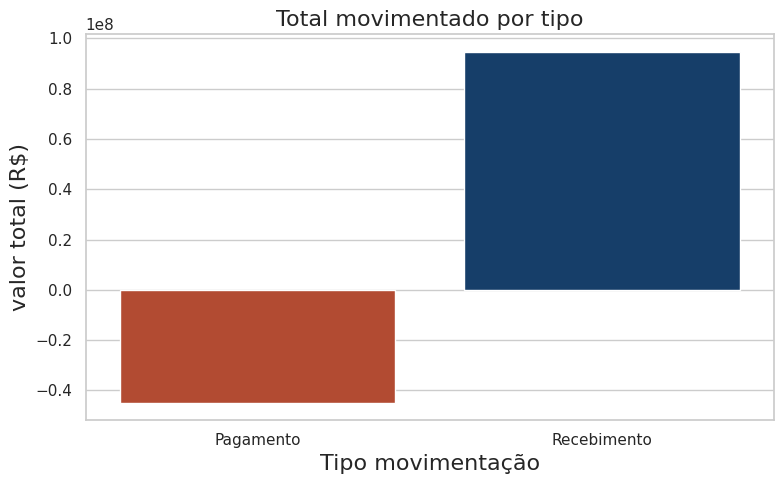

In [33]:
# Agrupando valores por tipo
graf_1 = df.groupby('tipo')['valor da movimentação'].sum()
graf_1 = pd.DataFrame(graf_1)
graf_1.reset_index(inplace=True)

# Gráfico
sns.barplot(x='tipo', y='valor da movimentação', data=graf_1, palette=["#C73E1D", "#083D77"])
plt.title('Total movimentado por tipo', fontsize=16)
plt.xlabel('Tipo movimentação', fontsize=16)
plt.ylabel('valor total (R$)', fontsize=16)
plt.tight_layout()

In [34]:
df.head()

,nome,município,data da movimentação,valor da movimentação,tipo,banco,forma pagamento
0,Caramuru Pie I,São Paulo,2020-01-02,675.87,Recebimento,Itaú,Pix
1,Indaia,Belo Horizonte,2020-01-04,1562555.94,Recebimento,Nubank,Boleto
2,Diamante Iii,São Paulo,2020-01-04,4970.12,Recebimento,Nubank,Boleto
3,Diamante Iii,São Paulo,2020-01-04,6716.79,Recebimento,Nubank,Pix
4,Diamante Iii,Vitória,2020-01-04,7072.15,Recebimento,Bradesco,MercadoPago


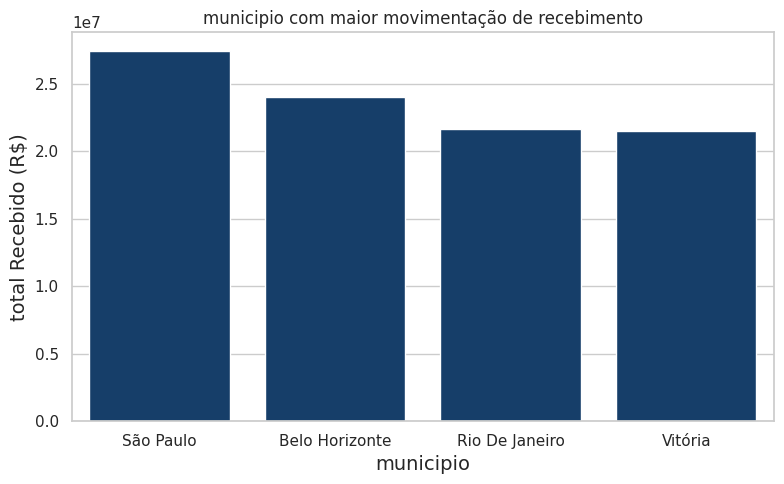

In [35]:
# municipio com maior movimentação
graf_2 = df[df['tipo'] == 'Recebimento'].groupby('município')['valor da movimentação'].sum().sort_values(ascending=False).head(10)
graf_2 = pd.DataFrame(graf_2).reset_index()

# plotando gráfico
sns.barplot(data=graf_2, x='município', y='valor da movimentação', color="#083D77")
plt.title('municipio com maior movimentação de recebimento', fontsize=12)
plt.xlabel('municipio', fontsize=14)
plt.ylabel('total Recebido (R$)', fontsize=14)
plt.tight_layout()

In [49]:
#municipios com maiores movimentações
df[df['tipo'] == 'Recebimento'].groupby('município')['valor da movimentação'].sum().sort_values(ascending=False)

,valor da movimentação
município,
São Paulo,27425098.10
Belo Horizonte,24044409.59
Rio De Janeiro,21635781.62
Vitória,21497577.63


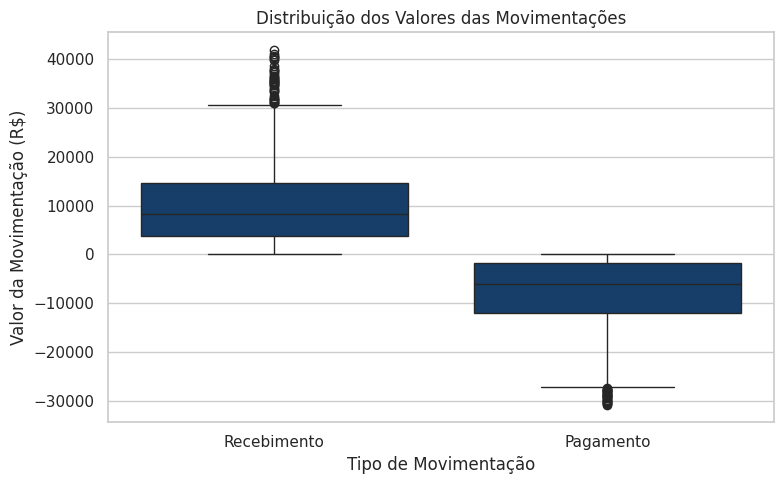

In [37]:
# Calcular os limites de outliers usando IQR
Q1, Q3 = np.percentile(df['valor da movimentação'], [25, 75])
IQR = Q3 - Q1

# Definir um limite superior e inferior para filtrar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar os valores dentro desse intervalo
df_filtrado = df[(df['valor da movimentação'] >= limite_inferior) &
                 (df['valor da movimentação'] <= limite_superior)]

# Criar o boxplot
sns.boxplot(data=df_filtrado, x='tipo', y='valor da movimentação', color='#083D77')
plt.title('Distribuição dos Valores das Movimentações')
plt.xlabel('Tipo de Movimentação')
plt.ylabel('Valor da Movimentação (R$)')
plt.tight_layout()

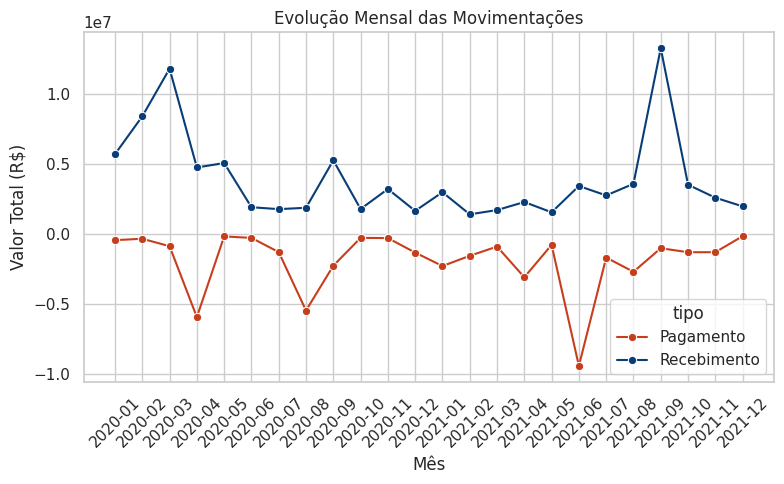

In [38]:
# Gráfico com evolução das movimentações mensalmente
df['ano_mes'] = df['data da movimentação'].dt.to_period('M')
evolucao = df.groupby(['ano_mes', 'tipo'])['valor da movimentação'].agg(['sum', 'count']).reset_index()
evolucao['ano_mes'] = evolucao['ano_mes'].astype(str)

sns.lineplot(data=evolucao, x='ano_mes', y='sum', hue='tipo', marker='o', palette=['#C73E1D', '#083D77'])
plt.title('Evolução Mensal das Movimentações')
plt.xlabel('Mês')
plt.ylabel('Valor Total (R$)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-39-ea3a1853812b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  formas_pag = df.groupby(['tipo', 'forma pagamento'])['valor da movimentação'].sum().unstack()


(array([0, 1]), [Text(0, 0, 'Pagamento'), Text(1, 0, 'Recebimento')])

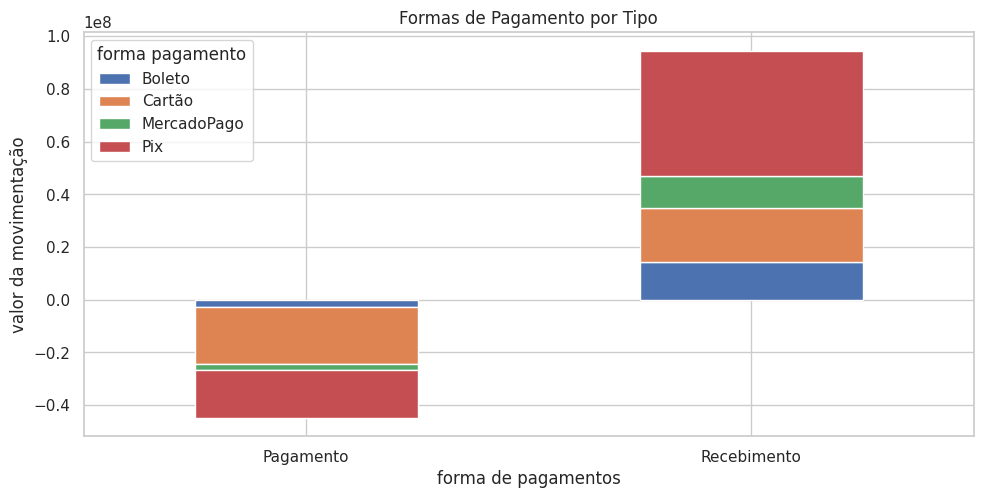

In [39]:
# identificando formas de pagamento mais frequentes
formas_pag = df.groupby(['tipo', 'forma pagamento'])['valor da movimentação'].sum().unstack()
formas_pag.plot(kind='bar', stacked=True, figsize=(10,6), title="Formas de Pagamento por Tipo")
plt.xlabel("forma de pagamentos", fontsize=12)
plt.ylabel("valor da movimentação", fontsize=12)
plt.tight_layout()
plt.xticks(rotation=0)

In [40]:
# municipio que concentra a maior quantidade de lojas
muni = df.groupby("município")['nome'].count().sort_values(ascending=False)
muni

,nome
município,
São Paulo,725
Vitória,683
Belo Horizonte,660
Rio De Janeiro,657


# conclusão

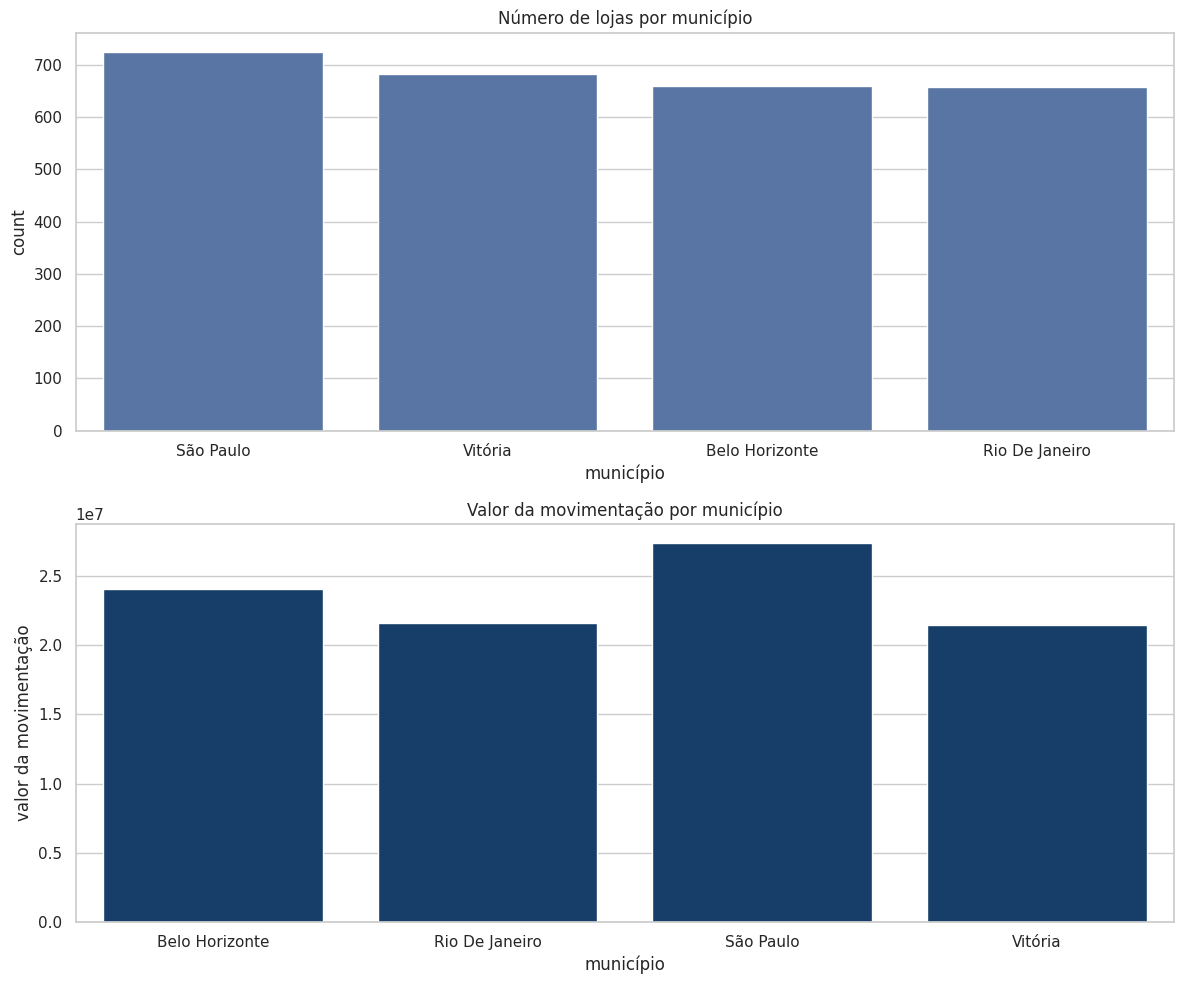

In [43]:
#criando uma figura maior
plt.figure(figsize=(12, 10))

# Primeiro subplot - Gráfico de barras do número de lojas
plt.subplot(2, 1, 1)  # 2 linhas, 1 coluna, primeiro gráfico
sns.barplot(data=num_lojas, x='município', y='count')
plt.title("Número de lojas por município")

# Segundo subplot - Gráfico de barras do valor da movimentação
plt.subplot(2, 1, 2)  # 2 linhas, 1 coluna, segundo gráfico
sns.barplot(data=recebi_muni, x='município', y='valor da movimentação', color='#083D77')
plt.title("Valor da movimentação por município")

plt.tight_layout()

In [44]:
# total das movimentações
df['valor da movimentação'].sum()

np.float64(49739026.02)

<ipython-input-45-72ab88fa9a77>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  formas_mensal = df_receb.groupby(['mês', 'forma pagamento'])['valor da movimentação'].sum().reset_index()


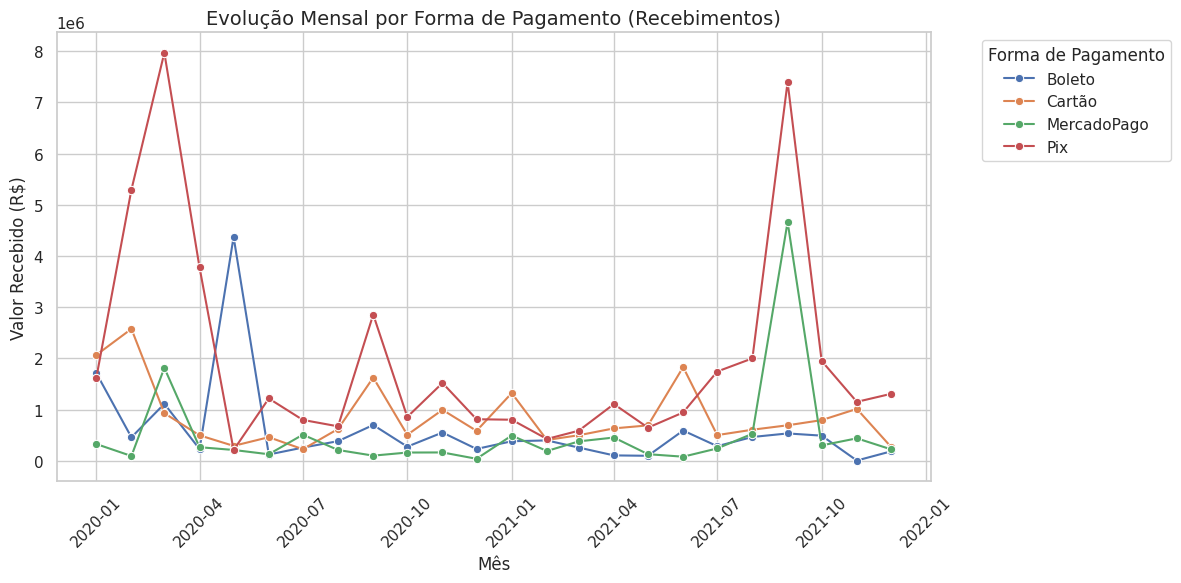

In [45]:
# Criar coluna de mês
df['mês'] = df['data da movimentação'].dt.to_period('M').dt.to_timestamp()

# Filtrar só RECEBIMENTOS
df_receb = df[df['tipo'] == 'Recebimento']

# Agrupar por mês e forma de pagamento
formas_mensal = df_receb.groupby(['mês', 'forma pagamento'])['valor da movimentação'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=formas_mensal, x='mês', y='valor da movimentação', hue='forma pagamento', marker='o')
plt.title('Evolução Mensal por Forma de Pagamento (Recebimentos)', fontsize=14)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Valor Recebido (R$)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Forma de Pagamento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [46]:
# alguma loja responsavel por maior parte da despesa?
df[df['tipo'] == 'Pagamento'].groupby('nome')['valor da movimentação'].sum().sort_values(ascending=True).head(10)

,valor da movimentação
nome,
Notaro Paulista,-8667090.74
Elian,-3593090.68
Unimed Poa,-2951318.77
Nova Olinda B,-2703968.32
Indaia,-2297195.91
Xavantina,-2255390.37
Yamada Matriz,-1749458.15
Zaccaria,-1701000.33
Incopisos,-1561268.86


In [48]:
df.to_excel("Base financeira tratada.xlsx", index=False)